# Week3授業前課題2 住宅情報の分析

## 1.このテキストについて

テキストの目的
データ分析の基本的な流れを知る
データ分析ライブラリのPandasに慣れる
KaggleのNotebooksを利用する

どのように学ぶか
定番のデータセットを通じて、データ分析の流れやライブラリの使い方を学びます。

## 2.エイムズ市の住宅価格

アイオワ州エイムズ市の住宅価格データセットを使い、基本的なデータの扱い方を学んでいきます。


住宅に関する79種類もの説明変数が用意されているため、それらと価格との関係を探索していきましょう。


エイムズがどのような街なのかもWikipediaなどで確認しておくと良いでしょう。


Ames, Iowa - Wikipedia

## 3.KaggleのNotebooks

Kaggleでは「Notebooks」としていろいろな人がデータ探索（EDA）を行ったコードが共有されています。良いEDAをたくさん見て、ノウハウを吸収していきましょう。今回の課題をやる上でも参考にしたり、課題になっていないことに挑戦したりしてください。


これ以降Kaggleを利用していきますので、アカウントを作成してください。


《参考Notebooks》


Comprehensive data exploration with Python | Kaggle（まずはここから）


House Prices : EDA to ML (Beginner) | Kaggle


A Home for Pandas and Sklearn: Beginner How-Tos | Kaggle

## 4.データセットの準備

データセットはKaggleからダウンロードします。


House Prices: Advanced Regression Techniques | Kaggle


上記URLを開き、Dataのページへ移動してください。

この中のtrain.csvを使用します。これをダウンロードし、Jupyter Notebookで使っているディレクトリに置いてください。

## 【問題1】データセットの取得
pd.read_csv()を使用して、変数に格納してください。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("train.csv", index_col=0)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 【問題2】データセット自体の調査
KaggleのOverviewページや、Dataページの「Data fields」などを読みながら、どのようなデータセットかを説明してください。

## ▼説明
住宅購入者向けに建物の価値を説明するためのテーブルデータ。
79個の説明変数から目的変数【Salesprice】を予測するデータセット。

## 5.データの概観

## 【問題3】データの確認
データを確認していきます。コードとマークダウンを組み合わせてレポートしてください。


各特徴量がどういったものかを見る。（数値データか文字データなど）
今回の目的変数はどの列か確認する。
特徴量の平均値と標準偏差、四分位数を一度に表示させる。

In [3]:
# 各統計値をサマリ表示する
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## ▼説明
1460行と80列のテーブルデータ。79個の説明変数、目的変数は最右列の【Salesprice】。
df.describeで出力されるデータ列は37列となるため、数値データ（量的変数）が36変数、文字データ（質的変数）が43変数である。


## 【問題4】欠損値への対応
欠損値に関して以下のことを行い、レポートしてください。


各特徴量の欠損値の有無を確認する。

欠損値の確認にはmissingnoというライブラリを活用しましょう。このライブラリにより欠損値の有無が可視化できます。インストールや使い方に関しては以下のページをご覧ください。


ResidentMario/missingno: Missing data visualization module for Python.


欠損値が何パーセント含まれるかを確認する。

・5つ以上欠損値がある特徴量（列）は削除する。
・欠損値があるサンプル（行）は削除する。

In [4]:
import quilt
import missingno as msno

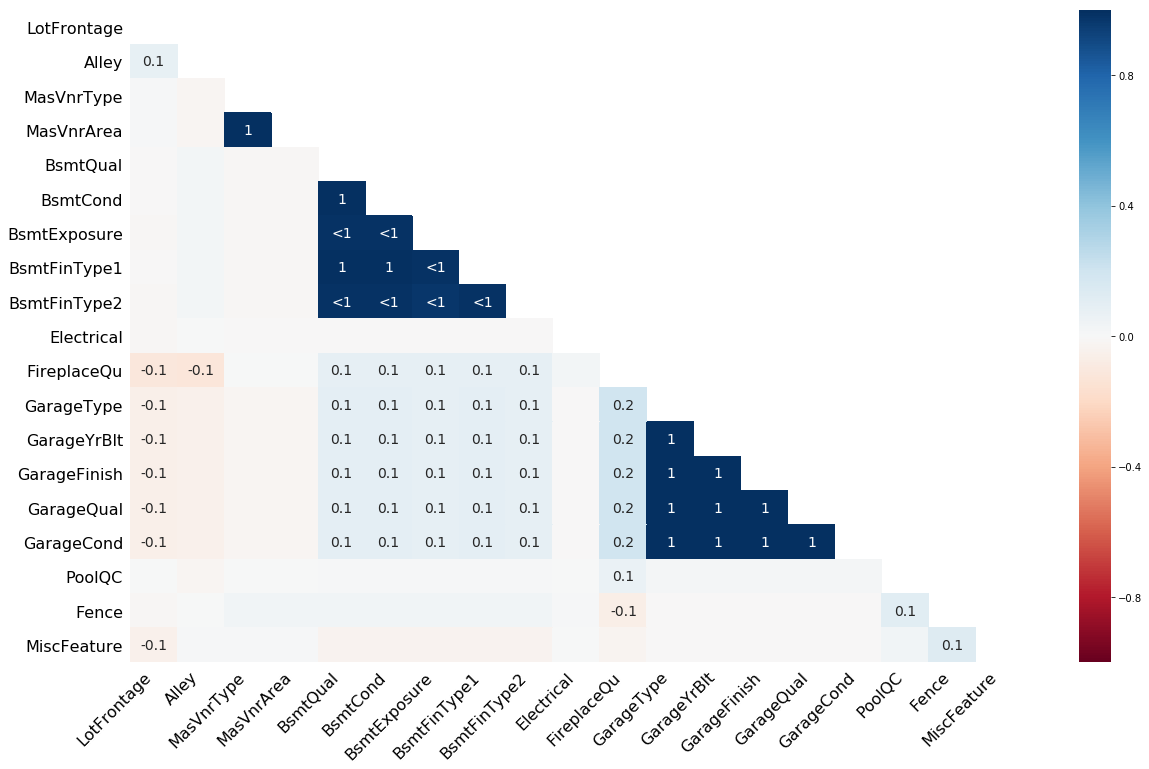

In [5]:
# 各特徴量の欠損値の有無を確認する。
msno.heatmap(df)

In [6]:
# 欠損値が何パーセント含まれるかを確認する。
df.isnull().sum()

df_isnull = df.T
df_isnull[1] = df.isnull().sum()
df_isnull[2] = df_isnull[1] / 1460
df_isnull = df_isnull.iloc[:, 0:2]
df_isnull = df_isnull.rename(columns={1: "Total", 2: "missing_ratio"})
df_isnull

Id,Total,missing_ratio
MSSubClass,0,0.000000
MSZoning,0,0.000000
LotFrontage,259,0.177397
LotArea,0,0.000000
Street,0,0.000000
Alley,1369,0.937671
LotShape,0,0.000000
LandContour,0,0.000000
Utilities,0,0.000000
LotConfig,0,0.000000


In [7]:
# 5つ以上欠損値がある特徴量（列）は削除する。
"""
5つ以上の欠損値のラベル
["LotFrontage", "Alley", "MasVnrType", "MasVnrArea", "BsmtQual", "FireplaceQu", 
 "GarageType", "GarageYrBlt", "GarageFinish", "GarageQual", "GarageCond",
 "PoolQC", "Fence", "MiscFeature"]
"""
df_drop = df.drop(columns=["LotFrontage", "Alley", "MasVnrType", "MasVnrArea", "BsmtQual", "FireplaceQu", "GarageType", "GarageYrBlt", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"])
df_drop.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [8]:
# 欠損値があるサンプル（行）は削除する。
# .all()で全ての要素がNaNか判定、.any()でいつでもNaNがあるか判定
df_drop.dropna(how="any")
df_drop

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000
6,50,RL,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,...,0,320,0,0,700,10,2009,WD,Normal,143000
7,20,RL,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,...,0,0,0,0,0,8,2007,WD,Normal,307000
8,60,RL,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,...,228,0,0,0,350,11,2009,WD,Normal,200000
9,50,RM,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,...,205,0,0,0,0,4,2008,WD,Abnorml,129900


## 6.目的変数

次は目的変数がどのような分布を持っているか確認していきます。

## 【問題5】用語の調査
以下の２つの単語を知る必要があります。これらを調査してまとめてください。


尖度
歪度

### ▼尖度
ヒストグラムを描画した時に、分布の山（峰）の大きさを示す
尖度>0：より尖った山が形成されている
尖度<0：より緩やかな山が形成
尖度=0：正規分布を描く山が形成

### ▼歪度
ヒストグラムを描画した時に、分布の山の位置を示す
歪度>0：山の頂点が左側にある（平均値より中央値や最頻値が小さい値になる）
歪度<0：山の頂点が右側にある（平均値より中央値や最頻値が大きい値になる）
歪度=0：山の頂点が中央にある（平均値と中央値と最頻値が同じ値（分布区間）になる）

## 【問題6】分布の確認
seabornのsns.distplot()を使い目的変数の分布を表示し、「尖度」と「歪度」も算出する。
目的変数に対して対数変換を行う。
対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する。

対数変換の前後での変化を「正規分布」という言葉を含めて説明してください。このように加工することで予測時の精度を上げることができます。


seaborn.distplot — seaborn 0.9.0 documentation

In [9]:
import seaborn as sns

/Users/adachi-yuya/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


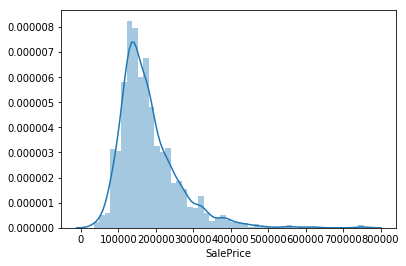

In [10]:
# 目的変数の分布を描画
x = df_drop.loc[:, "SalePrice"]
ax = sns.distplot(x)

In [11]:
# 尖度と歪度の算出
print("目的変数[Salesprice]の歪度は{:1.3f}である。".format(df_drop["SalePrice"].skew()))    #歪度：.skew()で求める　skewnessの略
print("目的変数[Salesprice]の尖度は{:1.3f}である。".format(df_drop["SalePrice"].kurt()))     #尖度：.kurt()で求める　kurtosisの略

目的変数[Salesprice]の歪度は1.883である。
目的変数[Salesprice]の尖度は6.536である。


目的変数[Salesprice]を対数変換した時の歪度は0.121である。
目的変数[Salesprice]を対数変換した時の尖度は0.810である。


/Users/adachi-yuya/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


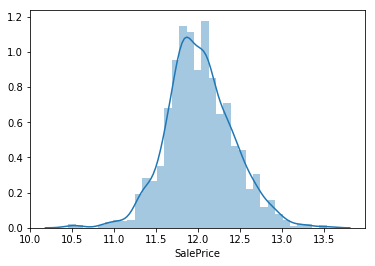

In [12]:
# 目的変数に対して対数変換を行う
df_log_SalesPrice = np.log(df_drop["SalePrice"])

#対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する。
# グラフ描画
x = df_log_SalesPrice
ax = sns.distplot(x)

# 尖度」と「歪度」の算出
print("目的変数[Salesprice]を対数変換した時の歪度は{:1.3f}である。".format(df_log_SalesPrice.skew()))    #歪度：.skew()で求める　skewnessの略
print("目的変数[Salesprice]を対数変換した時の尖度は{:1.3f}である。".format(df_log_SalesPrice.kurt()))     #尖度：.kurt()で求める　kurtosisの略

## >>対数変換の前後での変化を「正規分布」という言葉を含めて説明してください。

#### ▼回答
対数変換することで、数値の大きなデータやばらつきのあるデータ群を圧縮することができる。例えば、100円のボールペンと10万円のパソコンと2000万円の一戸建ての3つをそのままで比べることはできないが、対数変換すると、4.6/11.5/16.8と圧縮される。
尖度・歪度の数値を見ても、変換前の1.883/6.536に対し、変換後は0.121/0.810といずれも0に近づき、正規分布に近似している。

しかし、「対数変換すると正規分布に近似する」これがなぜなのか説明はできないのですが、①数値が圧縮されること②正規分布の確率密度関数に対数logの底であるネイピア数eが存在することが関係しているのではないかと思います。

## 7.特徴量

## 【問題7】相関係数の確認
特徴量の確認をしていきます。それぞれに対してマークダウンで説明や考察を書いてください。


相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。
目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。
選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる。
選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。

《補足》


重回帰分析などで予測する場合、相関が高すぎる特徴量の組み合わせがあると予測に悪影響が出ることがあります。このような場合の簡単な対処方法として、そういった特徴量の組みを探し出して、１つに絞るということがあります。

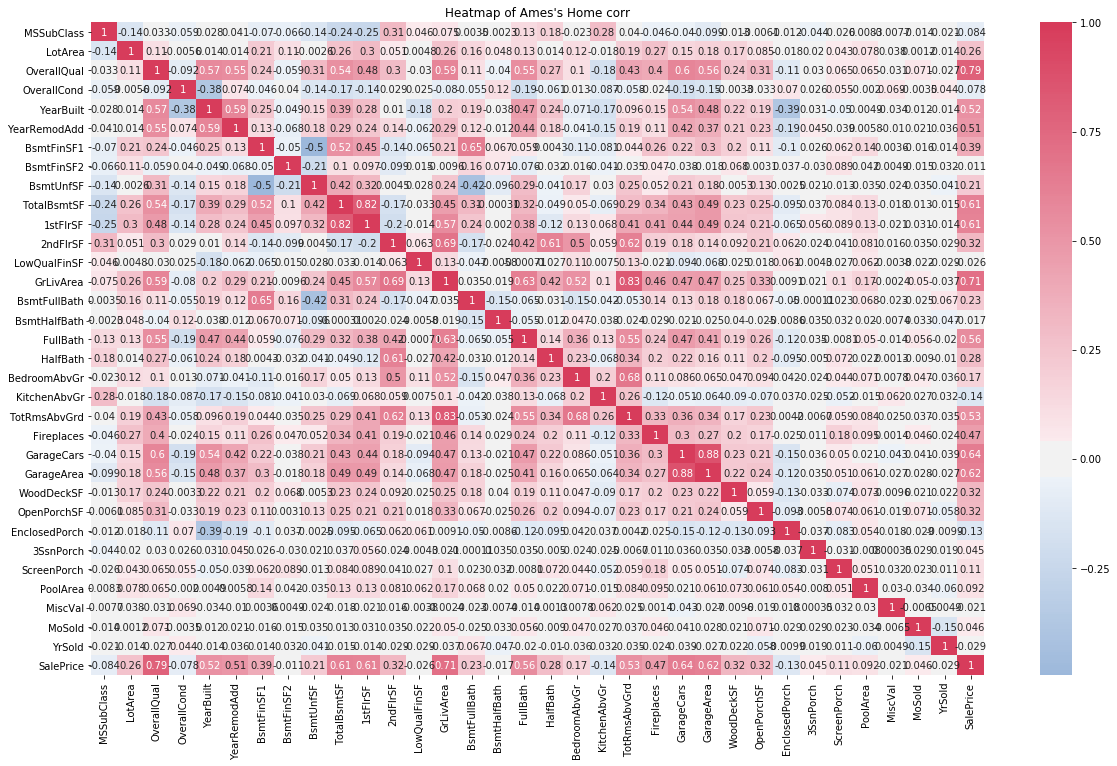

In [13]:
# 相関係数行列
df_corr = df_drop.corr()

# ヒートマップ描画
fig, ax = plt.subplots(figsize=(20,12))

ax = sns.heatmap(
    df_corr,
    xticklabels=df_corr.columns,
    yticklabels=df_corr.columns,
    cmap=sns.diverging_palette(250, 5, as_cmap=True),
    center=0,
    annot=True,
    linecolor='white')

ax.set_title("Heatmap of Ames's Home corr")
plt.show()

In [14]:
# 目的変数との相関の高い特徴量10個
df_sorted_SalesPrice = df_corr.sort_values(by="SalePrice", ascending=False)
df_sorted_SalesPrice.head(11)

# トップ10に圧縮
df_corr_top10 = df_sorted_SalesPrice.iloc[:11, :]
df_corr_top10 = df_corr_top10.loc[:, df_corr_top10.index]

df_corr_top10

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
SalePrice,1.000000,0.790982,0.708624,0.640409,0.623431,0.613581,0.605852,0.560664,0.533723,0.522897,0.507101
OverallQual,0.790982,1.000000,0.593007,0.600671,0.562022,0.537808,0.476224,0.550600,0.427452,0.572323,0.550684
GrLivArea,0.708624,0.593007,1.000000,0.467247,0.468997,0.454868,0.566024,0.630012,0.825489,0.199010,0.287389
GarageCars,0.640409,0.600671,0.467247,1.000000,0.882475,0.434585,0.439317,0.469672,0.362289,0.537850,0.420622
GarageArea,0.623431,0.562022,0.468997,0.882475,1.000000,0.486665,0.489782,0.405656,0.337822,0.478954,0.371600
TotalBsmtSF,0.613581,0.537808,0.454868,0.434585,0.486665,1.000000,0.819530,0.323722,0.285573,0.391452,0.291066
1stFlrSF,0.605852,0.476224,0.566024,0.439317,0.489782,0.819530,1.000000,0.380637,0.409516,0.281986,0.240379
FullBath,0.560664,0.550600,0.630012,0.469672,0.405656,0.323722,0.380637,1.000000,0.554784,0.468271,0.439046
TotRmsAbvGrd,0.533723,0.427452,0.825489,0.362289,0.337822,0.285573,0.409516,0.554784,1.000000,0.095589,0.191740
YearBuilt,0.522897,0.572323,0.199010,0.537850,0.478954,0.391452,0.281986,0.468271,0.095589,1.000000,0.592855


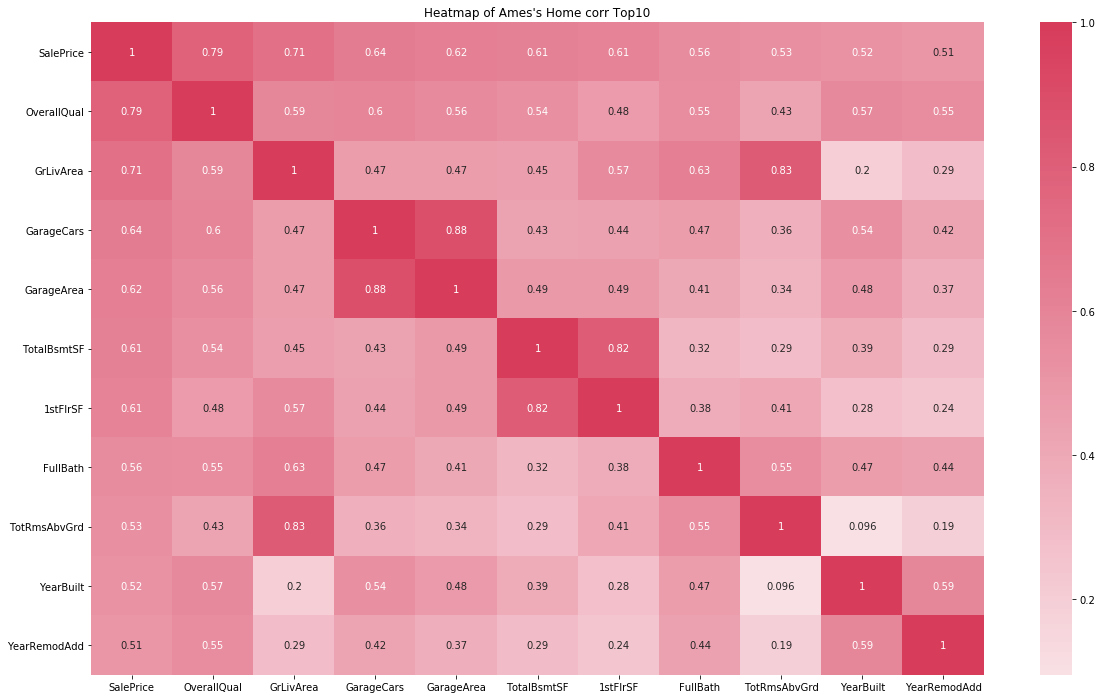

In [15]:
# トップ10のヒートマップ描画
fig, ax = plt.subplots(figsize=(20,12))

ax = sns.heatmap(
    df_corr_top10,
    xticklabels=df_corr_top10.columns,
    yticklabels=df_corr_top10.columns,
    cmap=sns.diverging_palette(250, 5, as_cmap=True),
    center=0,
    annot=True,
    linecolor='white')

ax.set_title("Heatmap of Ames's Home corr Top10")
plt.show()

## >>選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる。

#### ▼回答
'OverallQual'　建物の材料と品質
'GrLivArea'　リビングの平方フィート
'GarageCars'　ガレージに入る車のサイズ
'GarageArea'　ガレージの平方フィート
'TotalBsmtSF'　地下面積の合計平方フィート
'1stFlrSF'　1階の平方フィート
'FullBath'　浴室の数　（1~3個）
'TotRmsAbvGrd'　良質な部屋の合計数
'YearBuilt'　築年数
'YearRemodAdd'　改築してからの年数


## >>選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。

#### ▼回答
'GarageCars'と'GarageArea'　相関係数：0.88
'GrLivArea'と'TotRmsAbvGrd'　相関係数：0.83
'TotalBsmtSF'と'1stFlrSF'　相関係数：0.82

似たラベルの相関係数が高いことがわかる。